In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv, norm
from sklearn.preprocessing import normalize

from HW1 import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 圖片來源種類

In [2]:
source='bunny'

# read LightSource.txt
讀取光源

In [3]:
with open("test/{}/LightSource.txt".format(source),'r') as f:
    L = []
    for l in f.readlines():
        l = l.replace('\n','').replace('(','').replace(')','').split(' ')[1].split(',')
        l = [int(i) for i in l]
        L.append(l)

# to array        
L = np.array(L)

In [4]:
L

array([[ 238,  235, 2360],
       [ 298,   65, 2480],
       [-202,  225, 2240],
       [-252,  115, 2310],
       [  18,   45, 2270],
       [ -22,  295, 2230]])

# read images
讀取影像

In [5]:
img1 = read_bmp('test/{}/pic1.bmp'.format(source)).reshape(-1)
img2 = read_bmp('test/{}/pic2.bmp'.format(source)).reshape(-1)
img3 = read_bmp('test/{}/pic3.bmp'.format(source)).reshape(-1)
img4 = read_bmp('test/{}/pic4.bmp'.format(source)).reshape(-1)
img5 = read_bmp('test/{}/pic5.bmp'.format(source)).reshape(-1)
img6 = read_bmp('test/{}/pic6.bmp'.format(source)).reshape(-1)

In [6]:
I = np.vstack((img1,img2,img3,img4,img5,img6))
I.shape

(6, 14400)

# KdN
利用pesudo-inverse計算KdN

In [7]:
KdN = pinv((L.T@L))@L.T@I
KdN = KdN.T  # 需要再轉置一次，畫出來結果才是對的

In [8]:
# 正規化
N = normalize(KdN, axis=1, norm="l2")

# 影像呈現

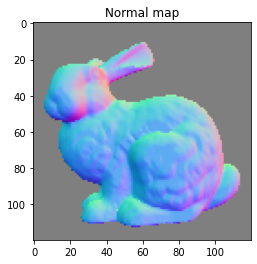

In [9]:
normal_visualization(N)

# Surface Reconstruction

In [56]:
N_map = np.copy(np.reshape(N, (120, 120, 3)))

In [54]:
s = 120*120
M = np.zeros((2*s,s))
V = np.zeros((2*s,1))

In [73]:
index = {}
i = 0
for x in range(120):
    for y in range(120):
        index[y,x] = i
        i=i+1